**LIBRARIES**

In [3]:
!pip install opencv-python

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

**TASK 1**

**Load and Display**

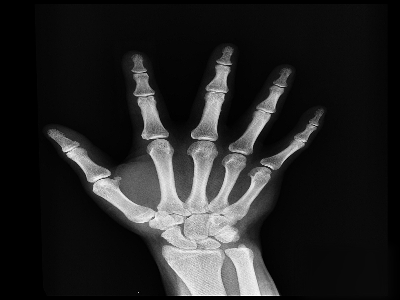

In [5]:
image = cv2.imread('/content/sample_data/hand-x-ray.jpg', cv2.IMREAD_GRAYSCALE)
new_width = 400
new_height = 300
resized_image = cv2.resize(image, (new_width, new_height))
cv2_imshow(resized_image)


**Contrast Enhancement**

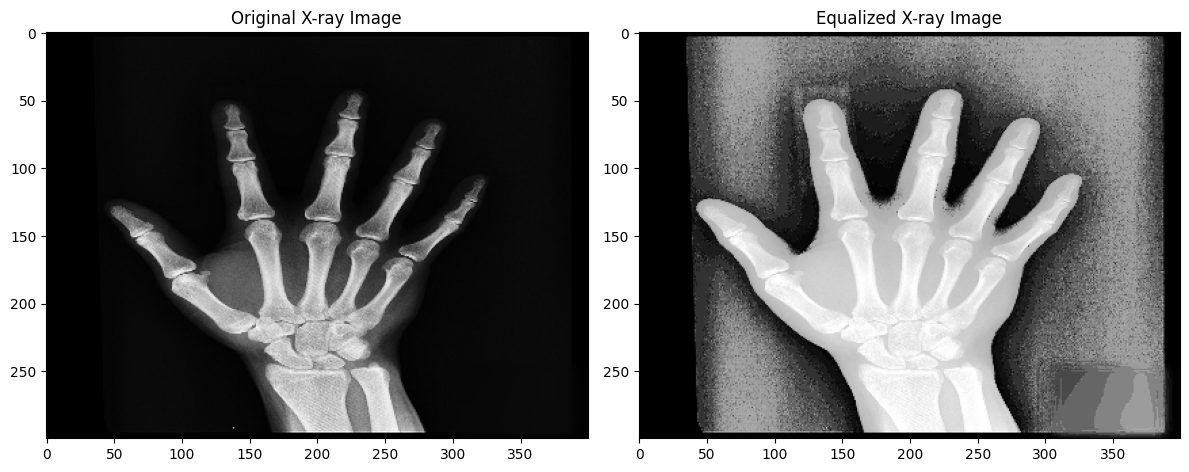

In [6]:
equalized_image = cv2.equalizeHist(resized_image)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(resized_image, cmap='gray')
plt.title("Original X-ray Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized X-ray Image")

plt.tight_layout()
plt.show()

**Color Mapping**

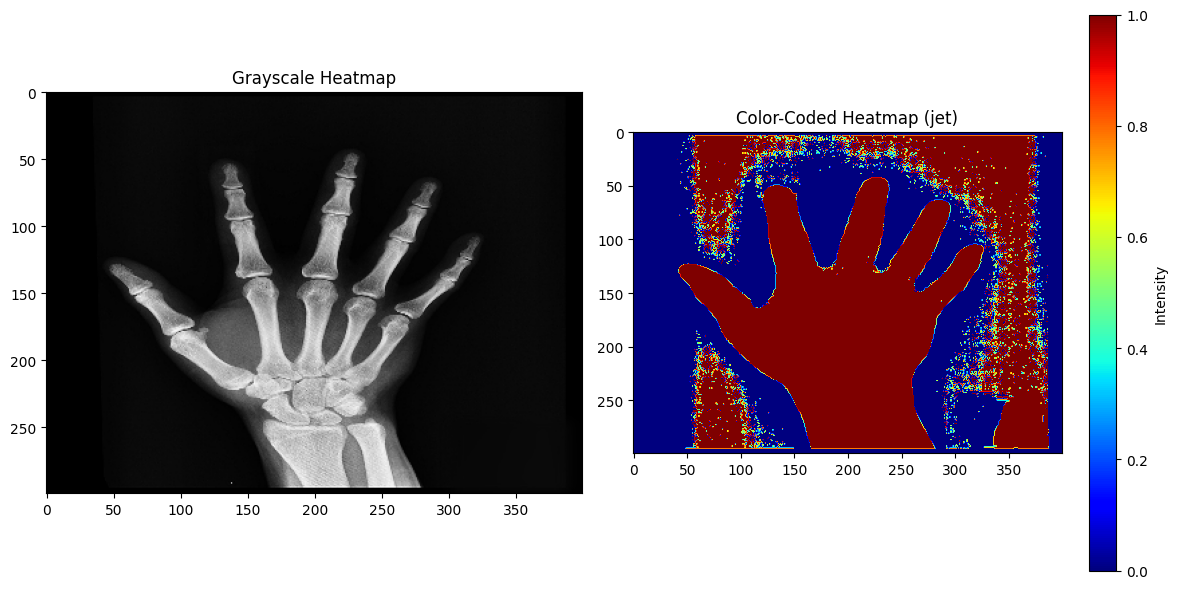

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(resized_image, cmap='gray')
ax1.set_title("Grayscale Heatmap")

normalized_image = cv2.normalize(equalized_image, None, 0, 1, cv2.NORM_MINMAX)
cax2 = ax2.imshow(normalized_image, cmap='jet')
ax2.set_title("Color-Coded Heatmap (jet)")
cbar = fig.colorbar(cax2, ax=ax2)
cbar.set_label('Intensity')

plt.tight_layout()
plt.show()


**Color Balance**

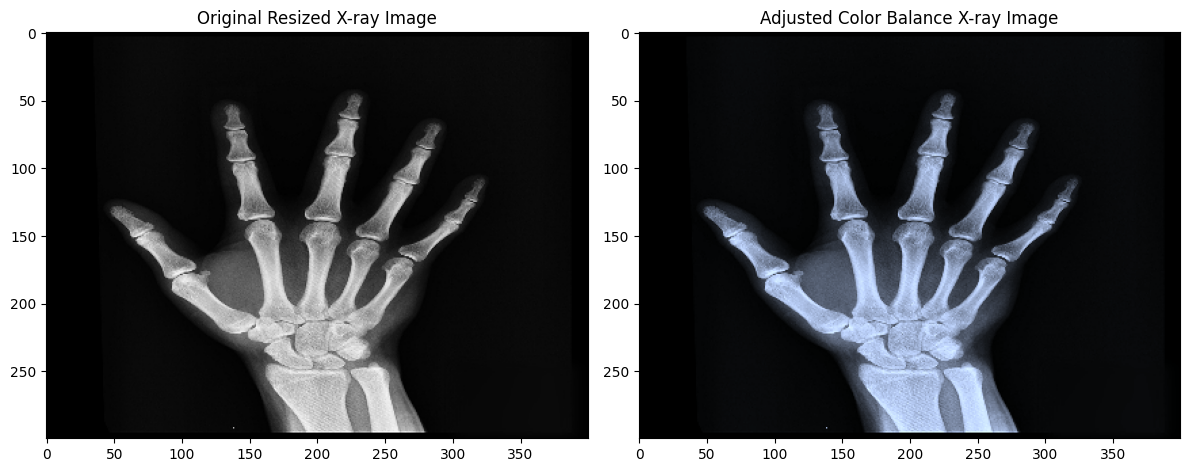

In [8]:
blue_scale = 1.2
green_scale = 1.0
red_scale = 0.9

adjusted_image = np.zeros((resized_image.shape[0], resized_image.shape[1], 3), dtype=np.uint8)
adjusted_image[:, :, 0] = (resized_image * blue_scale).clip(0, 255).astype(np.uint8)
adjusted_image[:, :, 1] = (resized_image * green_scale).clip(0, 255).astype(np.uint8)
adjusted_image[:, :, 2] = (resized_image * red_scale).clip(0, 255).astype(np.uint8)

adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(resized_image, cmap='gray')
ax1.set_title("Original Resized X-ray Image")

ax2.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Adjusted Color Balance X-ray Image")

plt.tight_layout()
plt.show()

**Color Filtering**

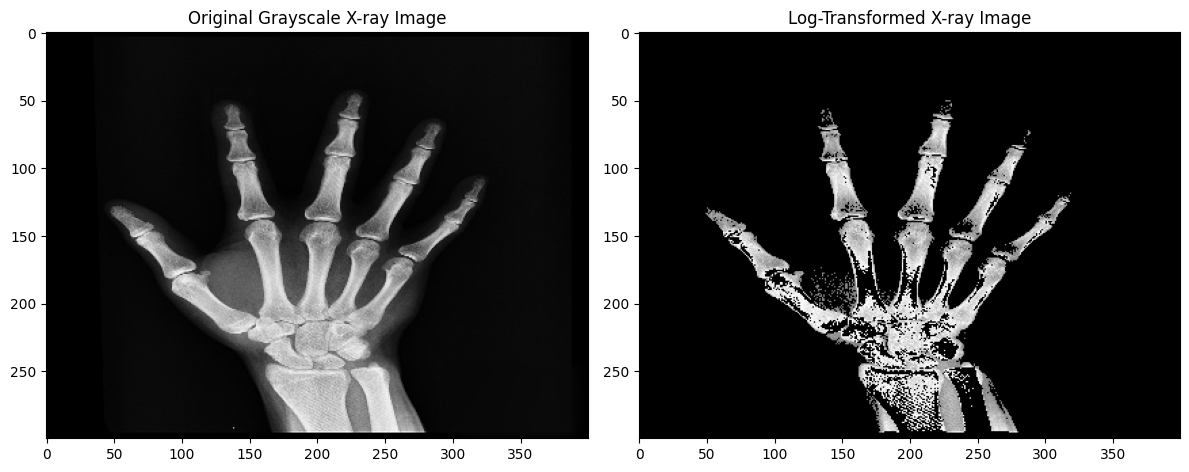

In [9]:
lower_threshold = 100
upper_threshold = 200

mask = cv2.inRange(resized_image, lower_threshold, upper_threshold)

filtered_image = cv2.bitwise_and(resized_image, resized_image, mask=mask)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(resized_image, cmap='gray')
ax1.set_title("Original Grayscale X-ray Image")

ax2.imshow(filtered_image, cmap='gray')
ax2.set_title("Log-Transformed X-ray Image")

plt.tight_layout()
plt.show()

**Logarithmic Transformation**

<ipython-input-10-d4060c0eb8bc>:2: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * (np.log(resized_image + 1))


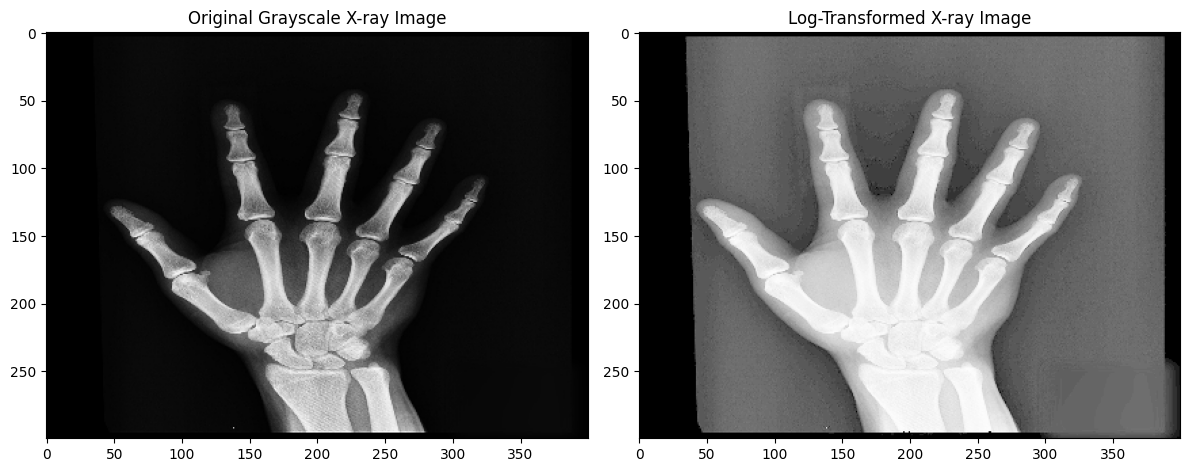

In [10]:
c = 255 / np.log(1 + np.max(resized_image))
log_transformed_image = c * (np.log(resized_image + 1))

log_transformed_image = np.clip(log_transformed_image, 0, 255).astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(resized_image, cmap='gray')
ax1.set_title("Original Grayscale X-ray Image")

ax2.imshow(log_transformed_image, cmap='gray')
ax2.set_title("Log-Transformed X-ray Image")

plt.tight_layout()
plt.show()

**Power-Law Transformation**

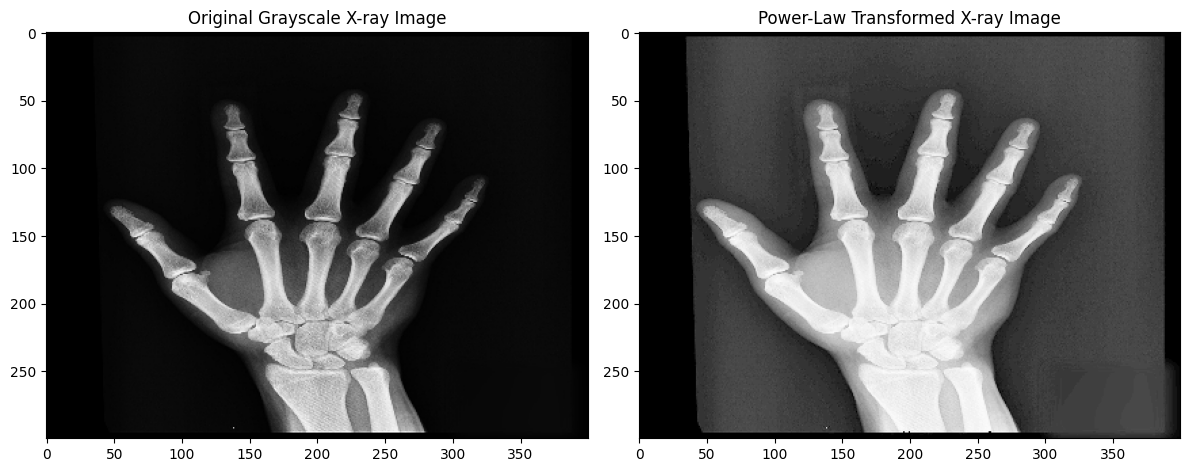

In [11]:
gamma = 1.5
power_law_transformed_image = np.power(log_transformed_image / 255.0, gamma) * 255.0
power_law_transformed_image = power_law_transformed_image.astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(resized_image, cmap='gray')
ax1.set_title("Original Grayscale X-ray Image")

ax2.imshow(power_law_transformed_image, cmap='gray')
ax2.set_title("Power-Law Transformed X-ray Image")

plt.tight_layout()
plt.show()




**TASK 2**

**Load Modalities**

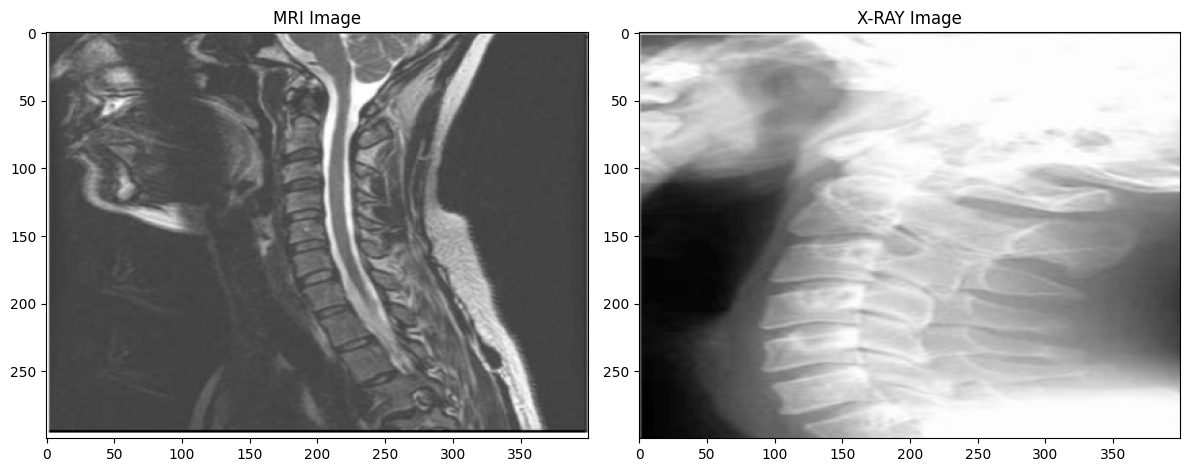

In [12]:
# BOTH PICS ARE OF THE SAME REIGON


MRI = cv2.imread('/content/sample_data/MRI.jpg', cv2.IMREAD_GRAYSCALE)
XRAY = cv2.imread('/content/sample_data/XRAY.jpg', cv2.IMREAD_GRAYSCALE)

new_width = 400
new_height = 300

MRI_image = cv2.resize(MRI, (new_width, new_height))
XRAY_image = cv2.resize(XRAY, (new_width, new_height))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(MRI_image, cmap='gray')
ax1.set_title("MRI Image")

ax2.imshow(XRAY_image, cmap='gray')
ax2.set_title("X-RAY Image")

plt.tight_layout()
plt.show()


**Histogram Equalization for Each Modality**

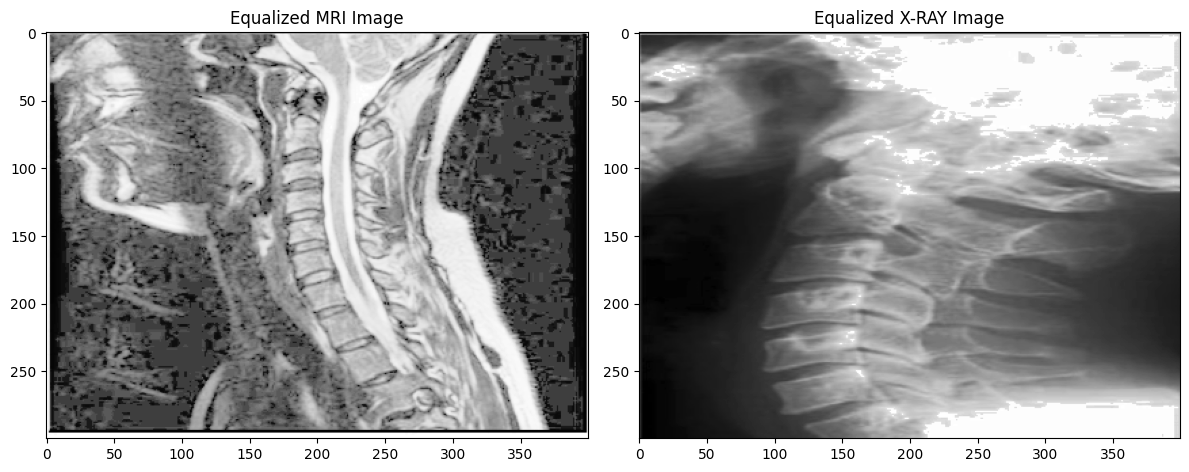

In [13]:
equalized_MRI_image = cv2.equalizeHist(MRI_image)
equalized_XRAY_image = cv2.equalizeHist(XRAY_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(equalized_MRI_image, cmap='gray')
ax1.set_title("Equalized MRI Image")

ax2.imshow(equalized_XRAY_image, cmap='gray')
ax2.set_title("Equalized X-RAY Image")

plt.tight_layout()
plt.show()


**Color Mapping and Fusion**

<ipython-input-14-ed1e8a63da9e>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet_colormap = plt.cm.get_cmap('jet')


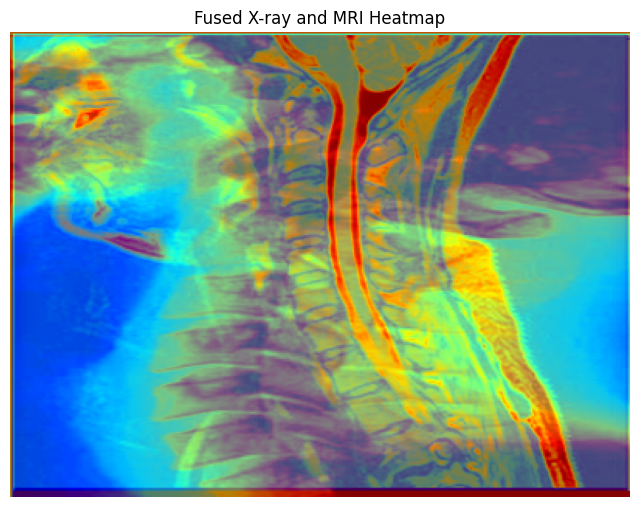

In [14]:
jet_colormap = plt.cm.get_cmap('jet')
xray_colormap = jet_colormap(XRAY_image)
mri_colormap = jet_colormap(MRI_image)

alpha = 0.5

fused_image = cv2.addWeighted(xray_colormap, 1 - alpha, mri_colormap, alpha, 0)

plt.figure(figsize=(8, 8))
plt.imshow(fused_image)
plt.title("Fused X-ray and MRI Heatmap")
plt.axis('off')
plt.show()

**Multi-Modal Weighted Fusion**

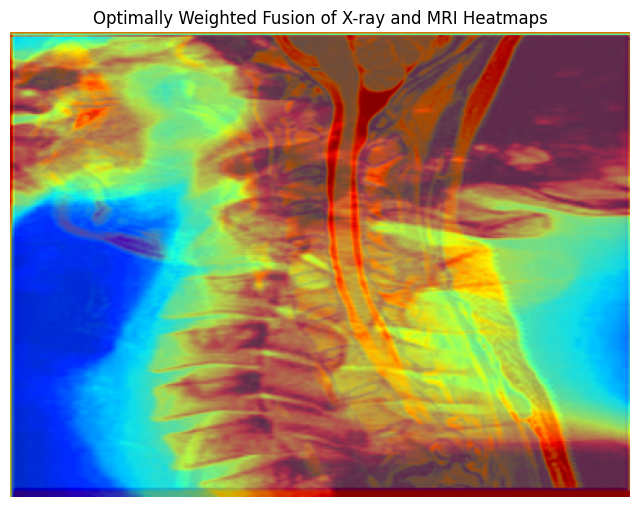

In [15]:
weight_xray = 0.7
weight_mri = 0.3

total_weight = weight_xray + weight_mri
weight_xray /= total_weight
weight_mri /= total_weight

fused_image = cv2.addWeighted(xray_colormap, weight_xray, mri_colormap, weight_mri, 0)

# Create a figure and display the fused image
plt.figure(figsize=(8, 8))
plt.imshow(fused_image)
plt.title("Optimally Weighted Fusion of X-ray and MRI Heatmaps")
plt.axis('off')
plt.show()

**Logarithmic and Power-Law Transformations**

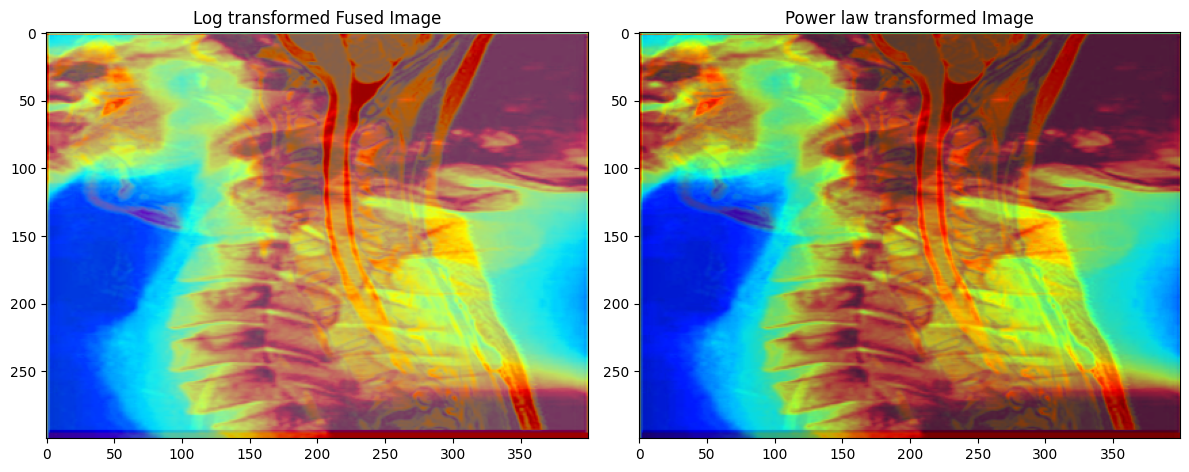

In [16]:
c = 255 / np.log(1 + np.max(fused_image))
log_transformed_image = c * (np.log(fused_image + 1))

log_transformed_image = np.clip(log_transformed_image, 0, 255).astype(np.uint8)


gamma = 1.5
power_law_transformed_image = np.power(log_transformed_image / 255.0, gamma) * 255.0
power_law_transformed_image = power_law_transformed_image.astype(np.uint8)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(log_transformed_image, cmap='gray')
ax1.set_title("Log transformed Fused Image")

ax2.imshow(power_law_transformed_image, cmap='gray')
ax2.set_title("Power law transformed Image")

plt.tight_layout()
plt.show()

**Comparative Analysis**

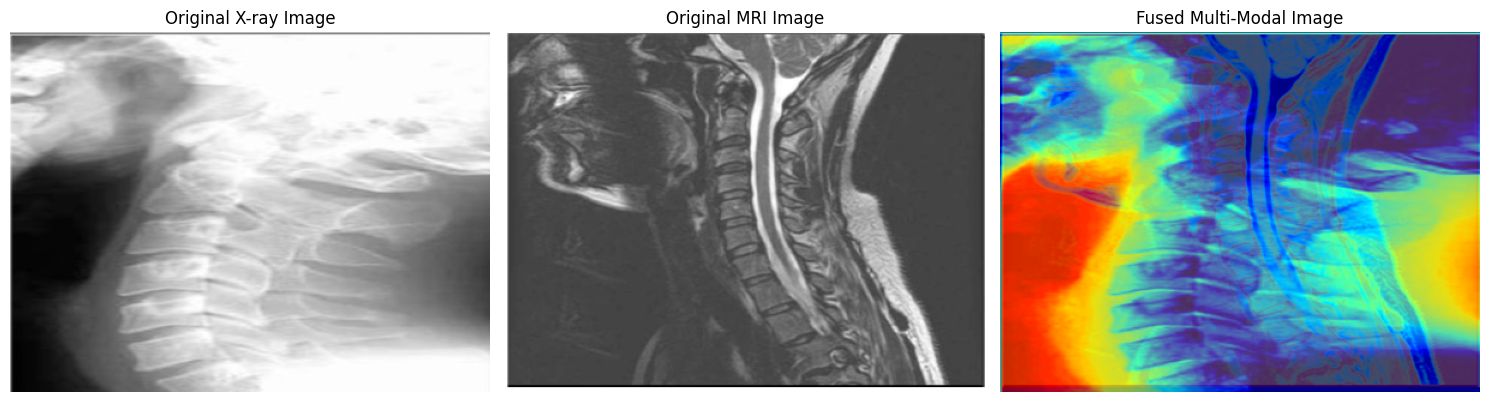

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(XRAY_image, cmap='gray')
ax1.set_title("Original X-ray Image")
ax1.axis('off')

ax2.imshow(MRI_image, cmap='gray')
ax2.set_title("Original MRI Image")
ax2.axis('off')

fused_image_display = cv2.normalize(fused_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
ax3.imshow(cv2.cvtColor(fused_image_display, cv2.COLOR_BGR2RGB))
ax3.set_title("Fused Multi-Modal Image")
ax3.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

**TASK 3**